In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**Import** **library**

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import os

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'drive/MyDrive/project/data/train'
valid_path = 'drive/MyDrive/project/data/val'


Load a dataset from the google drive.In data set there are three floder one is train set and another is test set.In all three floder there four sub floder is there. 1.diseased cotton leaf 2.diseased cotton plant 3.fresh cotton leaf 4.fresh cotton plant



In [4]:
import tensorflow
resnet101 =tensorflow.keras.applications.ResNet101(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

171450368/171446536 [==============================] - 2s 0us/step


In [5]:
for layer in resnet101.layers:
    layer.trainable = False
folders = glob('drive/MyDrive/project/data/train/*')
print("length of train floder is:",len(folders))
x = Flatten()(resnet101.output)
prediction = Dense(len(folders), activation='softmax')(x)
resent101_model = Model(inputs=resnet101.input, outputs=prediction)

length of train floder is: 4


In [6]:
resent101_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:

resent101_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('drive/MyDrive/project/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = test_datagen.flow_from_directory('drive/MyDrive/project/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [9]:
for i in os.listdir("drive/MyDrive/project/data/train/"):
    print(str(len(os.listdir("drive/MyDrive/project/data/train/"+i))) +" "+ i +" images")

288 diseased cotton leaf images
815 diseased cotton plant images
421 fresh cotton plant images
427 fresh cotton leaf images


In [10]:
for i in os.listdir("drive/MyDrive/project/data/val/"):
    print(str(len(os.listdir("drive/MyDrive/project/data/val/"+i))) +" "+ i +" images")

101 diseased cotton plant images
88 fresh cotton plant images
55 diseased cotton leaf images
80 fresh cotton leaf images


In [11]:
r = resent101_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 833s 13s/step - loss: 3.6631 - accuracy: 0.3607 - val_loss: 1.1496 - val_accuracy: 0.5340
Epoch 2/20
61/61 [==============================] - 38s 616ms/step - loss: 0.9830 - accuracy: 0.6027 - val_loss: 0.9194 - val_accuracy: 0.6296
Epoch 3/20
61/61 [==============================] - 38s 616ms/step - loss: 0.9326 - accuracy: 0.6141 - val_loss: 0.7819 - val_accuracy: 0.7160
Epoch 4/20
61/61 [==============================] - 37s 613ms/step - loss: 0.8444 - accuracy: 0.6580 - val_loss: 0.8710 - val_accuracy: 0.6543
Epoch 5/20
61/61 [==============================] - 37s 610ms/step - loss: 0.9066 - accuracy: 0.6363 - val_loss: 1.0065 - val_accuracy: 0.6235
Epoch 6/20
61/61 [==============================] - 37s 612ms/step - loss: 0.8925 - accuracy: 0.6421 - val_loss: 0.9124 - val_accuracy: 0.6420
Epoch 7/20
61/61 [==============================] - 37s 610ms/step - loss: 0.8320 - accuracy: 0.6710 - val_loss: 0.7436 - val_accuracy: 0.7160


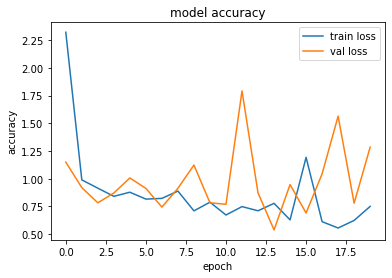

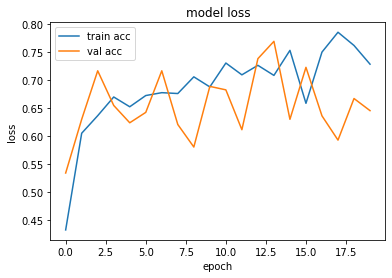

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
from tensorflow.keras.models import load_model
resent101_model.save('/content/drive/MyDrive/project/Resent101.h5')

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/diseased cotton leaf/dis_leaf (124).jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = resent101_model.predict(test_image)
predictions[result.argmax()]

'diseased cotton plant'

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/diseased cotton plant/dd (41).jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = resent101_model.predict(test_image)
predictions[result.argmax()]

'diseased cotton plant'

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/fresh cotton plant/dsd (228).jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = resent101_model.predict(test_image)
predictions[result.argmax()]

'fresh cotton plant'